In [2]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
%matplotlib inline

In [3]:
def get_sampling_dirs(a_dir, only=''):
    return sorted([filename for filename in glob.glob(join(a_dir,'*/PCAP-03-11_l'))])    

def get_num_of_records(d):
    filenames = ['LDAP.csv','MSSQL.csv','NetBIOS.csv','SYN.csv','UDP.csv','UDP-Lag.csv','records.csv']
    n_records= defaultdict(lambda: 0)
    for fn in filenames:
        df = pd.read_csv(join(d,fn),usecols=['Label'])
        res = df['Label'].value_counts()
        for row in res.iteritems():
            n_records[row[0]]+=row[1]
    return n_records   

def get_num_of_records_old(d):
    df = pd.read_csv(join(d,'label_dist.csv'),names=['Label','Count'])
    return df['Count'].sum()

In [7]:
def extract_sampler_names(dir_names):
    colors = []
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            color='orange'
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            color = 'green'
            label = 'Sketch Guided Sampling'
        elif 'RPS' in dir_name:
            color = 'blue'
            label = 'Random Packet Sampling'
        elif 'FFS' in dir_name:
            color = 'red'
            label = 'Fast Filtered Sampling'
        elif 'SEL' in dir_name:
            color = 'purple'
            label = 'Selective Flow Sampling'
        elif 'without_sampling_l' in dir_name:
            color = 'gray'
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        colors.append(color)
        sampler_names.append(label)
    return sampler_names

In [8]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]
records = defaultdict(list)
sampler_names = None
mln = 10**6

N = len(roots)
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs[1])
    

/data/juma/data/ddos/CSVs_r_1.0/SR_10/RPS_SI_10/PCAP-03-11_l
/data/juma/data/ddos/CSVs_r_0.1/SR_10/RPS_SI_10/PCAP-03-11_l
/data/juma/data/ddos/CSVs_r_0.01/SR_10/RPS_SI_10/PCAP-03-11_l
/data/juma/data/ddos/CSVs_r_0.001/SR_10/RPS_SI_10/PCAP-03-11_l
/data/juma/data/ddos/CSVs_r_0.0001/SR_10/RPS_SI_10/PCAP-03-11_l
/data/juma/data/ddos/CSVs_r_1e-05/SR_10/RPS_SI_10/PCAP-03-11_l


In [9]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]
records = defaultdict(list)
sampler_names = None
mln = 10**6

N = len(roots)
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = get_num_of_records(sampling_dirs[1])   
    print(num_records)
    labels = num_records.keys()
    for name in labels: 
        records[name].append(num_records[name]/mln)


defaultdict(<function get_num_of_records.<locals>.<lambda> at 0x7fa9f9447268>, {'NetBIOS': 690753, 'SYN': 1307884, 'UDP-Lag': 311, 'UDP': 1186703, 'LDAP': 368844, 'Benign': 14098, 'MSSQL': 968488})
defaultdict(<function get_num_of_records.<locals>.<lambda> at 0x7fa970f4eb70>, {'NetBIOS': 693425, 'SYN': 1402350, 'UDP-Lag': 311, 'UDP': 1186726, 'LDAP': 368844, 'Benign': 14234, 'MSSQL': 973809})
defaultdict(<function get_num_of_records.<locals>.<lambda> at 0x7fa9f9447268>, {'NetBIOS': 709804, 'SYN': 1636217, 'UDP-Lag': 311, 'UDP': 1186732, 'LDAP': 373885, 'Benign': 15474, 'MSSQL': 994664})
defaultdict(<function get_num_of_records.<locals>.<lambda> at 0x7fa970f4eb70>, {'NetBIOS': 709834, 'SYN': 1644094, 'UDP-Lag': 311, 'UDP': 1196236, 'LDAP': 373905, 'Benign': 16109, 'MSSQL': 994889})
defaultdict(<function get_num_of_records.<locals>.<lambda> at 0x7fa9f9447268>, {'NetBIOS': 709855, 'SYN': 1645024, 'UDP-Lag': 311, 'UDP': 1371236, 'LDAP': 373923, 'Benign': 17576, 'MSSQL': 994943})
defaultdic

4.537081000000001,=4.639699,=4.9170869999999995,=4.935378,=5.112868,=5.135832,=

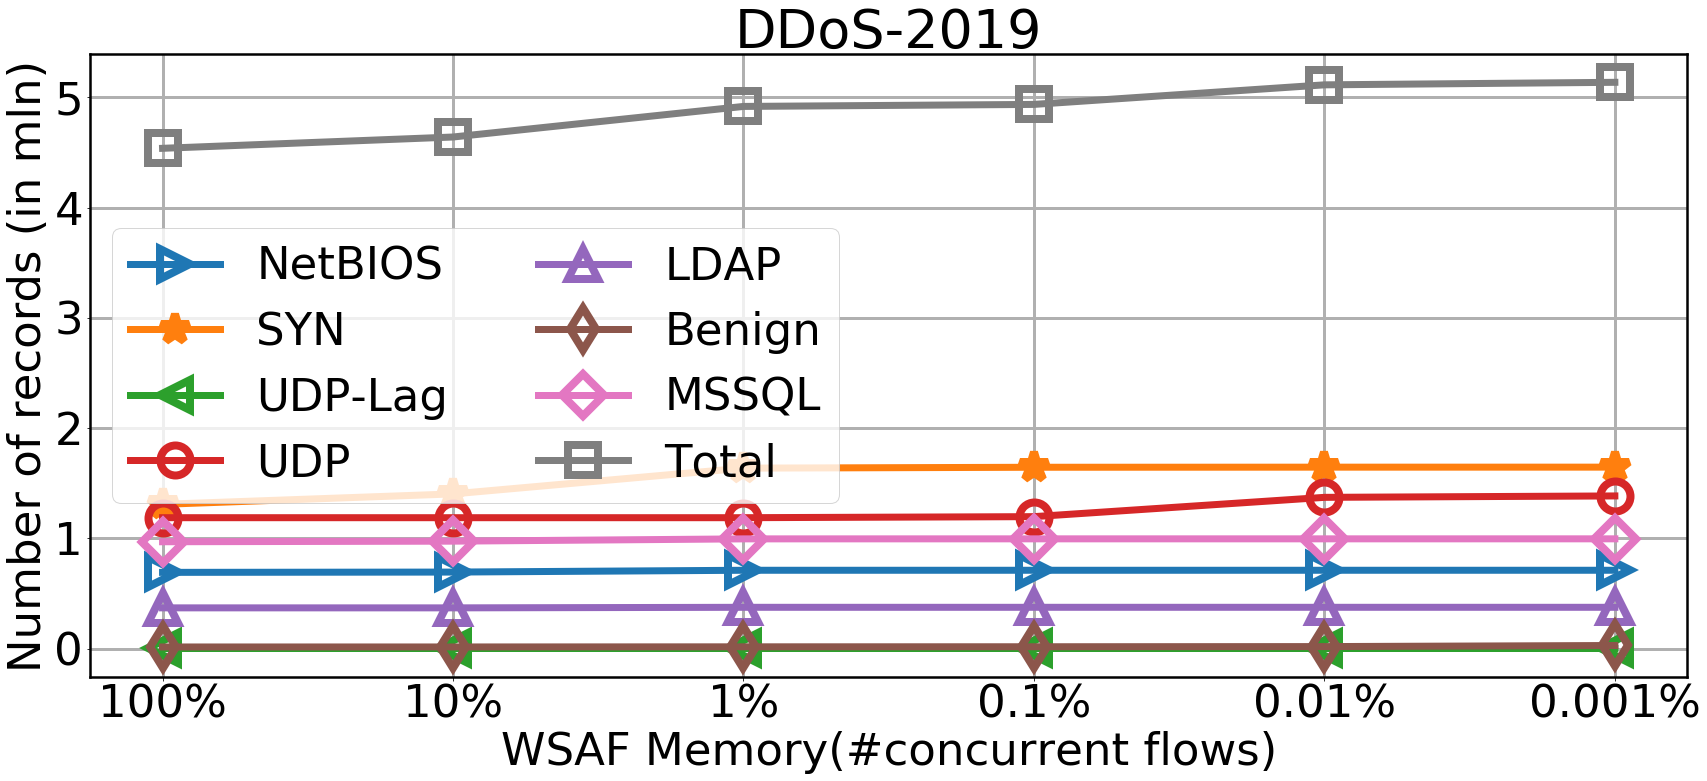

In [11]:
#drawing
ind = np.arange(N)

font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^','d','D']
total_count = 0
for i,name in enumerate(labels):
    #print(records[name])
    ax.plot(ind,records[name],label=name,linewidth=7,marker=markers[i],markeredgewidth=8,markersize=30,markerfacecolor='none')

total_counts = []
for i in range(6):
    total_count = sum([ records[name][i] for name in labels])
    total_counts.append(total_count)
    print(total_count,end=',=')
ax.plot(ind,total_counts,label='Total',linewidth=7,marker='s',markeredgewidth=8,markersize=30,markerfacecolor='none')

plt.grid(linewidth=3)
plt.title('DDoS-2019')
plt.ylabel('Number of records (in mln)')
plt.xlabel('WSAF Memory(#concurrent flows)')
#plt.yscale('log')
ax.set_xticklabels(['','100%','10%','1%','0.1%','0.01%','0.001%'])
#ax.set_ylim(3.80,6.2)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)

plt.savefig('/data/juma/data/ddos/effect_on_records_rps_percat_10.png', bbox_inches='tight',dpi=100)
plt.show()

In [12]:
5.14/4.54

1.13215859030837